# Задание 1

In [78]:
from fractions import Fraction
alph = []
count = 0
all_count = 2**9 #2^9 (9 символов,у каждого 2 значения)
for i in range(all_count): 
    x = bin(i).replace('0b', '') #поочередно перебираем все двоичные числа от нуля до 9 единиц
    x = '0' * (9-len(x)) + x #добавляем нули в начало двоичным числа,длина которых меньше нужной
    if(x==x[::-1]): #сравниваем строку с перевернутой для поиска палиндромов
        count+=1
print(Fraction(count,all_count))

1/16


# Задание 2

In [32]:
from sympy import factorial
def combinations(k,n):
    return factorial(n)/(factorial(n-k)*factorial(k))

p = (0.1 * (1-0.1)**3)*combinations(1,4)*0.2 + (0.1**2 * (1-0.1)**2)*combinations(2,4)*0.5 + (0.1**3 * (1-0.1))*combinations(3,4)*0.7 + (0.1)**4*combinations(4,4)*0.9
p

0.0852300000000000

# Задание 3

In [117]:
# Решение оформлено в Jupyter Notebook с использованием языка Python
# построим график
import plotly
import plotly.graph_objs as go
import random 
import numpy as np
x = np.arange(-10,2,0.01)
y = np.arange(-10,2,0.01)
x,y = np.meshgrid(x,y)
def f(x,y):
 return np.exp((x+y)/2)*(x**2-4*y**2)**3

fig1 = go.Surface(x=x, y=y, z=f(x,y))

plotly.offline.plot({"data": [fig1] },auto_open=True)

'temp-plot.html'

In [103]:
# попробуем решить обычным способом, однако для облегчения воспользуемся sympy
from sympy import *
from sympy import exp
x,y = symbols('x,y',real=True)
z = exp((x+y)/2)*(x**2-4*y**2)**3
dfx = diff(z,x)
dfy = diff(z,y)
dfxx = diff(dfx,x).simplify()
dfyy = diff(dfy,y).simplify()
dfxy = diff(dfx,y).simplify()
solution = solve((dfx,dfy),(x,y))
#получаем 4 стационарные точки

In [111]:
l = dfxx*dfyy - dfxy**2
l = l.simplify()
l.subs([(x,solution[1][0]),(y,solution[1][1])])
# 0

0

In [112]:
l.subs([(x,solution[2][0]),(y,solution[2][1])])
# 0

0

In [113]:
l.subs([(x,solution[3][0]),(y,solution[3][1])])
# 0

0

In [110]:
l.subs([(x,solution[0][0]),(y,solution[0][1])])
#больше нуля -> в этой точке есть экстремум
# 195689447424/e^12

195689447424*exp(-12)

In [105]:
dfxx.subs([(x,solution[0][0]),(y,solution[0][1])])
#меньше нуля -> это максимум
# −368640/e^6

-368640*exp(-6)

In [107]:
print(solution[0])
z.subs([(x,solution[0][0]),(y,solution[0][1])])
# (-16, 4)
# f = 7077888/e^6

(-16, 4)


7077888*exp(-6)

# Задание 4

In [67]:
import numpy as np
import random
from numba import njit
number_arr = np.arange(0,1,0.0001)
count_arr = np.zeros(len(number_arr))
n = 1000000
#Эта часть кода отвечает за симуляцию выбора всех трех игроков
@njit
def f(number_arr,j):
    count = 0
    for i in range(n):
        first = random.uniform(1,1/2)
        second = random.uniform(0,2/3)
        if(((first>number_arr[j] and second<number_arr[j])) or (first<number_arr[j] and second>number_arr[j])): #названоое число должно быть между числами двух других игроков
            count += 1  
    count = count/n
    return count
for i in range(len(number_arr)):
        count_arr[i] = f(number_arr,i)

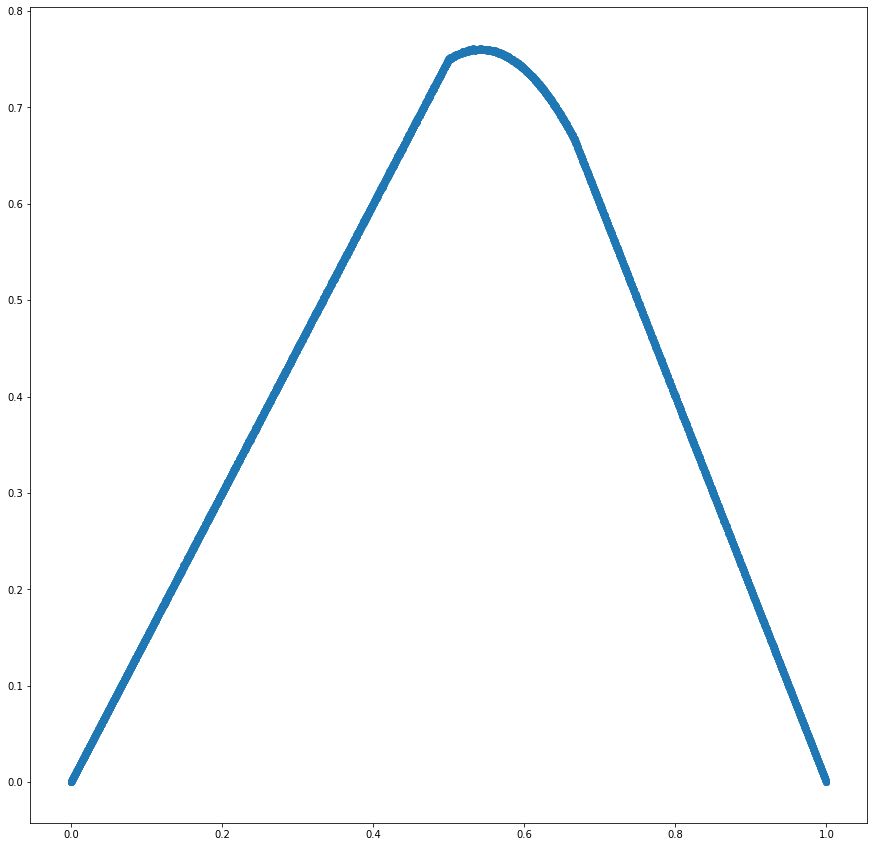

In [77]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 15))
plt.scatter(y = count_arr,x = number_arr)

In [70]:
# на графика мы можем увидеть, что наибольшая вероятность правильного выбора находится примерно между числами 1/2  и 2/3
# повторим симуляцию, но уже для этого промежутка

In [58]:
number_arr = np.arange(1/2,2/3,0.0001)
count_arr = np.zeros(len(number_arr))
n = 1000000
#Эта часть кода отвечает за симуляцию выбора всех трех игроков
@njit
def f(number_arr,j):
    count = 0
    for i in range(n):
        first = random.uniform(1,1/2)
        second = random.uniform(0,2/3)
        if(((first>number_arr[j] and second<number_arr[j])) or (first<number_arr[j] and second>number_arr[j])): #названоое число должно быть между числами двух других игроков
            count += 1  
    count = count/n
    return count
for i in range(len(number_arr)):
        count_arr[i] = f(number_arr,i)

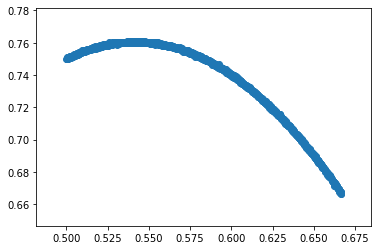

In [59]:
import matplotlib.pyplot as plt 
plt.scatter(y = count_arr,x = number_arr)

In [71]:
# видим нужную нам верхушку графика, попробуем апроксимировать ее функцией

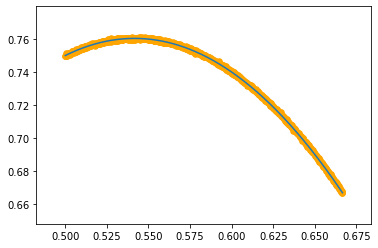

In [60]:
fit = np.polyfit(number_arr, count_arr, 2) # подбираем коэфициенты для полинома, который апроксимирует наши полученные значения
a,b,c = fit[0],fit[1],fit[2]
fit_equation = a * number_arr*number_arr + b * number_arr + c
plt.scatter(number_arr, count_arr, s=30, color='orange')
plt.plot(number_arr, fit_equation)

In [61]:
import sympy  #ищем максимум функции на нашем промежутке(стационарную точку)
from sympy.calculus.util import *
x = sympy.symbols('x')
f = a * x*x + b * x + c
ivl = Interval(1/2,2/3)
print(stationary_points(f,x,ivl))

FiniteSet(0.541636657529656)


# Задание 5

In [28]:
import numpy as np
from numba import njit
n = 1000000000
a = np.random.randint(0,2,n) #массив всех дней 1-дождь,0-дождя нет (интервал[0,2),поэтому на конце двойка)
@njit
def f(a):
    toggle = 1 # изначально зонт был дома
    cnt = 0 # счетчик дней,когда он таки смог взять зонт
    for i in a:
        if (i == 1):  # если идет дождь
            if(toggle == 1): # и если зонт дома
                cnt += 1 # увеличиваем наш счетчик на 1
            if(np.random.randint(1,101)<=20): # с вероятностью 0.2 зонт остается на работе
                toggle = 0 
            else:
                toggle = 1 
        else:         # если дождь не идет
            if(toggle == 0): # и зонт не дома (он забыл его в один из предыдущих дней)
                if(np.random.randint(1,101)<=20): # с вероятностью 0.2 зонт все еще остается на работе
                    toggle = 0 
                else:
                    toggle = 1
    return cnt/np.sum(a) # делим количество подходящих нам дней на общее кол-во дней ,когда шел дождь
f(a)
# 0.8888950318520529
# 0.8(8) -> 8/9

0.8888950318520529